In [1]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt


In [2]:
print ('insightface version', insightface.__version__)
print ('numpy version', np.__version__)

insightface version 0.7.3
numpy version 1.24.2


In [3]:
assert float('.'.join(insightface.__version__.split('.')[:2]))>=float('0.7')

In [4]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

/Users/adsaorcun/miniconda3/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/adsaorcun/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/adsaorcun/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/adsaorcun/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/adsaorcun/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/adsaorcun/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112,

In [5]:
swapper=insightface.model_zoo.get_model('inswapper_128.onnx',
                                       download=False,
                                       download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


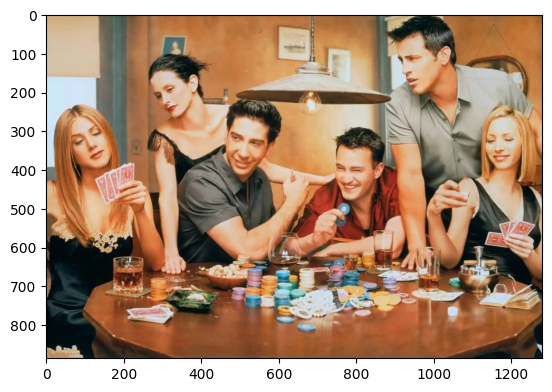

In [6]:
img=ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

The picture got channels. RGB  channels for making cv2 more reliable on model.

In [7]:
faces=app.get(img)

/Users/adsaorcun/miniconda3/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


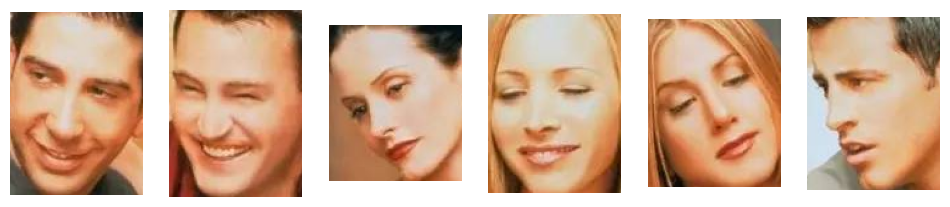

In [9]:
img=ins_get_image('t1')
fig,axs=plt.subplots(1,6, figsize=(12,5))

for i, face in enumerate(faces):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

# Swapping Faces Now

In [17]:
#First sort left to right

fasces=sorted(faces, key=lambda x:x.bbox[0])
res=img.copy()
assert len(faces)==6 #check before you wrote that cuz its the number of faces 
source_face=faces[0] #change number and check for faces 

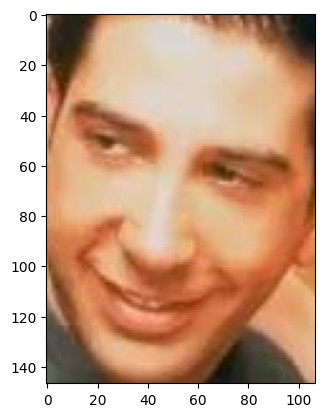

In [18]:
bbox=source_face['bbox']
bbox=[int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])

In [19]:
for face in faces:
    res=swapper.get(res,face,source_face,paste_back=True)

## After "swapper.get"